<a href="https://colab.research.google.com/github/Esteban191/ejercicio1/blob/master/Segmentacion_adui_no_supervisada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dependecias

In [ ]:
pip install scikit-maad

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
from google.colab import drive, output
drive.mount('/content/drive')
%load_ext autoreload
%autoreload 1
sys.path.append('/content/drive/MyDrive/Jaguas_2018')
%cd '/content/drive/MyDrive/Jaguas_2018'
    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1nfTdDkppiuyI6pOFb93wUYtK8j6DA0cv/Jaguas_2018


#Librerias

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
import librosa
import os
from pathlib import Path
import librosa.display
from librosa.display import specshow
import pickle
from IPython.display import Audio #reproducir audio
from sklearn.cluster import KMeans

#cargar audios

In [4]:
root_path = '/content/drive/MyDrive/Jaguas_2018'
folders = os.listdir(root_path)
files = []
for i in range(len(folders)):
    path_aux = "{}/{}".format(root_path, folders[i])
    files += list(Path(path_aux).rglob("*.{}".format("wav")))

filename = str(files[12000])

print(filename)


/content/drive/MyDrive/Jaguas_2018/G28_m/G28_20180610_164800.wav


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


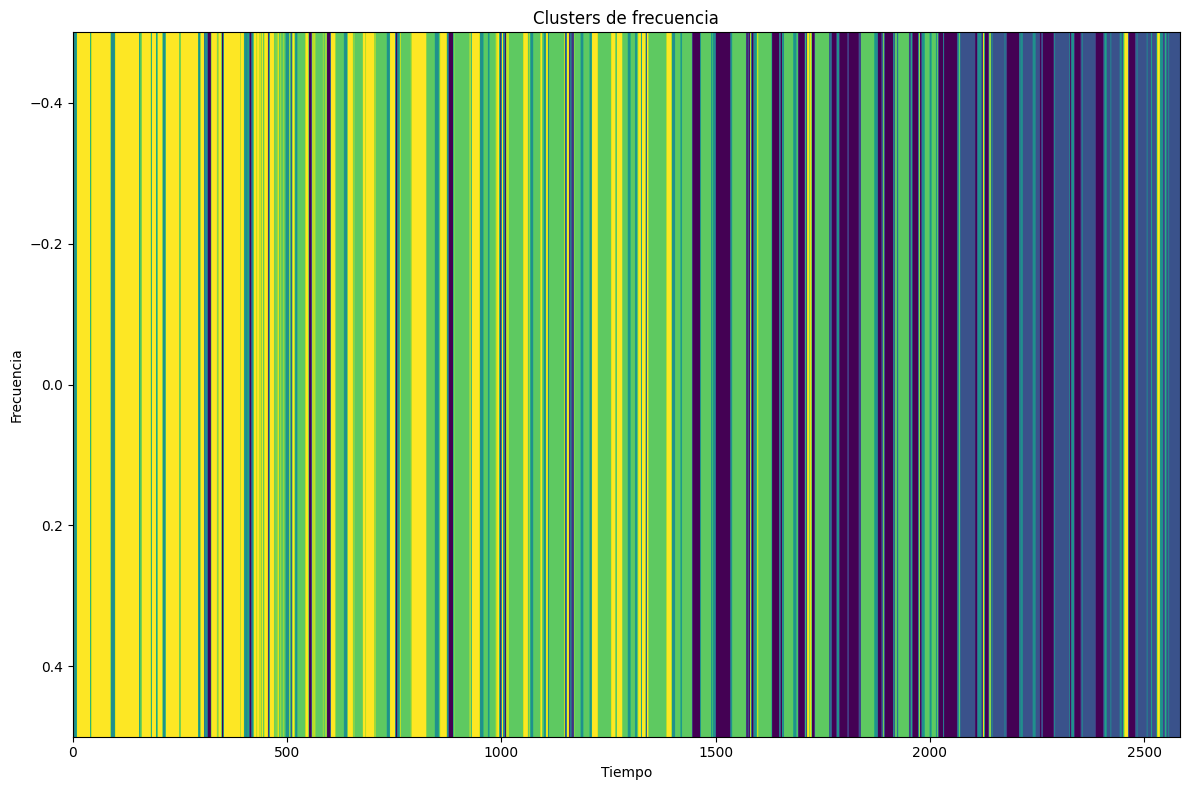

In [7]:
y, sr = librosa.load(filename)

# Realizar la transformada de Fourier de tiempo corto (STFT)
S = librosa.stft(y)

# Convertir la potencia a decibelios (dB)
S_dB = librosa.amplitude_to_db(abs(S), ref=np.max)

# Realizar clustering k-means en las frecuencias
n_clusters = 5 # número de clusters deseados
freq_clusters = KMeans(n_clusters=n_clusters).fit_predict(S_dB.T)

# Visualizar los clusters resultantes
plt.figure(figsize=(12, 8))
plt.imshow(freq_clusters.reshape(-1, 1).T, aspect='auto')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')
plt.title('Clusters de frecuencia')
plt.tight_layout()
plt.show()

#implementacion libreria Skid mad

In [ ]:
from maad import rois, util
import pandas as pd
import numpy as np
#im_zeros = np.zeros((100,300))
df_rois = pd.DataFrame({'min_y': [10, 40], 'min_x': [10, 200], 'max_y': [60, 80], 'max_x': [110, 250]})
im_blobs = rois.rois_to_imblobs(filename, df_rois)
util.plot2d(im_blobs)

##Encuentre la región de interés utilizando estimaciones conocidas de la longitud de la señal y los límites de frecuencia.

El enfoque general se basa en la transformada wavelet continua siguiendo un proceso de tres pasos

###Filter the signal with a bandpass sinc filter

###Smoothing the signal by convolving it with a Mexican hat wavelet (Ricker wavelet)

###Binarize the signal applying a linear threshold

/usr/local/lib/python3.9/dist-packages/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


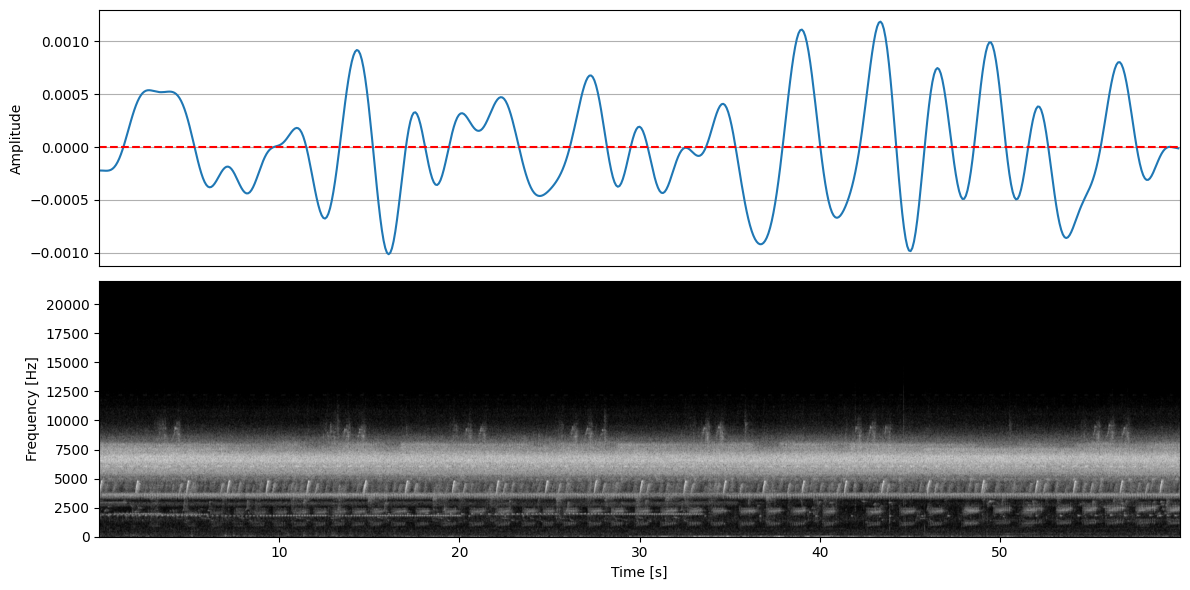

,min_f,min_t,max_f,max_t
0,4500.0,1.39320,8000.0,5.38703
1,4500.0,9.75238,8000.0,11.51710
2,4500.0,13.37469,8000.0,15.23229
3,4500.0,17.08989,8000.0,18.11156
4,4500.0,19.50476,8000.0,23.31283
5,4500.0,26.19211,8000.0,28.23546
6,4500.0,29.53578,8000.0,30.46458
7,4500.0,33.71537,8000.0,35.38721
8,4500.0,37.98785,8000.0,40.12408
9,4500.0,42.26032,8000.0,44.30367


In [13]:
from maad import sound, rois
s, fs = sound.load(filename)
rois.find_rois_cwt(s, fs, flims=(4500,8000), tlen=2, th=0, display=True)
#fimls = upper and lower frequencies (in Hz)
"""

sndarray
señal de entrada

endeble
frecuencias superior e inferior (en Hz)

tlenint
duración temporal de la señal buscada (en s)

flotador, opcional
umbral para binarizar la salida

pantalla: booleano, opcional, el valor predeterminado es falso
trazar los resultados si se establece en Verdadero, el valor predeterminado es Falso

save_dfbooleano, opcional
guardar los resultados en un archivo csv

savefilenamestr, opcional
Nombre del archivo para guardar la tabla como valores separados por comas (csv)

Devoluciones:
marco de datos de roispandas
una tabla con los límites temporales y frecuenciales de las regiones de interés
"""


# New Section

In [16]:
import maad
s, fs = maad.sound.load(filename)
Sxx,tn,fn,ext = maad.sound.spectrogram (s, fs, fcrop=(0,10000))   

/usr/local/lib/python3.9/dist-packages/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


In [17]:
Sxx_dB = maad.util.power2dB(Sxx) +96

In [18]:
Sxx_dB_blurred = maad.sound.smooth(Sxx_dB)

In [19]:
im_bin = maad.rois.create_mask(Sxx_dB_blurred, bin_std=1.5, bin_per=0.25, mode='relative') 

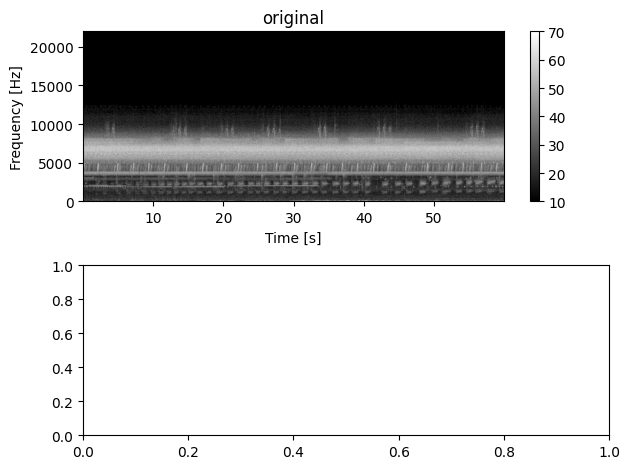

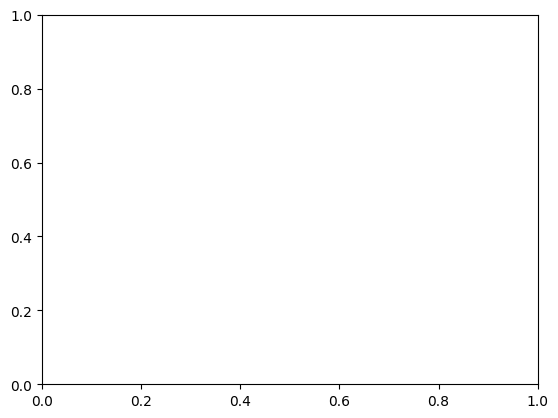

In [20]:
import matplotlib.pyplot as plt 
fig, (ax1, ax2) = plt.subplots(2, 1)
maad.util.plot2d(Sxx_dB, ax=ax1, extent=ext, title='original', vmin=10, vmax=70)
maad.util.plot2d(im_bin, ax=ax2, extent=ext, title='mask')
fig.set_size_inches(13,8)
fig.tight_layout() 

###

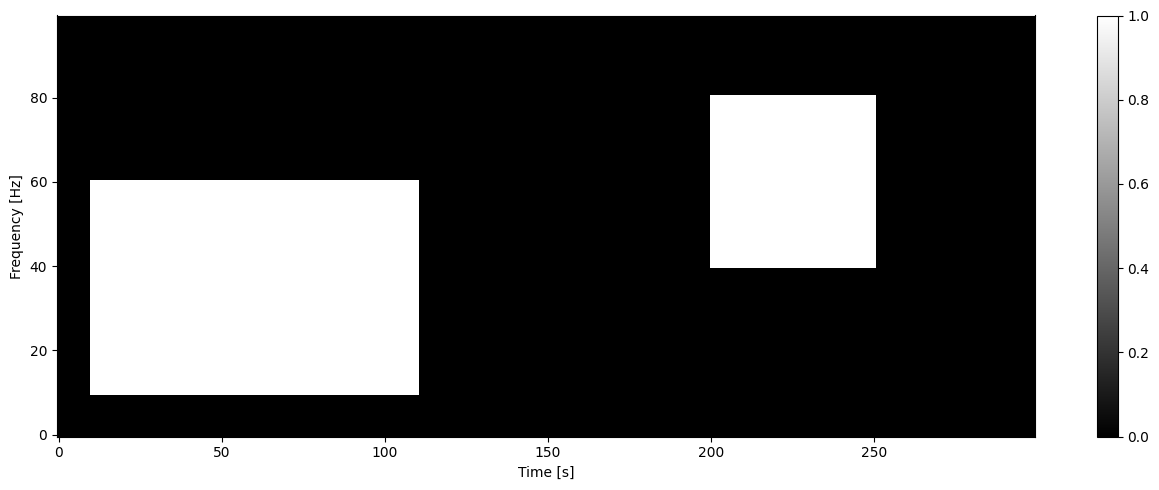

(<Axes: xlabel='Time [s]', ylabel='Frequency [Hz]'>,
 <Figure size 1300x500 with 2 Axes>)

In [21]:
from maad import rois, util
import pandas as pd
import numpy as np
im_zeros = np.zeros((100,300))
df_rois = pd.DataFrame({'min_y': [10, 40], 'min_x': [10, 200], 'max_y': [60, 80], 'max_x': [110, 250]})
im_blobs = rois.rois_to_imblobs(im_zeros, df_rois)
util.plot2d(im_blobs)

In [ ]:
s, fs = sound.load(filename)

# Crear espectrograma
Sxx, tn, fn, ext = sound.spectrogram(s, fs, window='hann', nperseg=512, noverlap=256, fcrop=(0, 10000))

# Segmentación de audio
threshold = -50  # Umbral para la segmentación
mask = Sxx > threshold  # Máscara booleana para separar las regiones de interés

# Convertir regiones de interés en imágenes binarias
im_zeros = np.zeros_like(Sxx)  # Crear matriz de ceros del mismo tamaño que el espectrograma
df_rois = rois.mask_to_bbox(mask)  # Convertir la máscara en un DataFrame de regiones de interés
im_blobs = rois.rois_to_imblobs(im_zeros, df_rois)  # Convertir las regiones de interés en imágenes binarias

# Visualización de los resultados
util.plot2d(Sxx, dB=True, extent=ext, title='Espectrograma')
util.plot2d(mask, extent=ext, title='Máscara booleana')
util.plot2d(im_blobs, extent=ext, title='Imágenes binarias')

In [30]:
s, fs = maad.sound.load(filename)
Sxx,tn,fn,ext = maad.sound.spectrogram(s, fs)
freq_idx = np.where(fn <= 20000)[0]
Sxx = Sxx[freq_idx,:]
fn = fn[freq_idx]
Sxx_dB = maad.util.power2dB(Sxx) + 96

/usr/local/lib/python3.9/dist-packages/maad/sound/input_output.py:113: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s = wavfile.read(filename)


In [31]:
Sxx_dB_blurred = maad.sound.smooth(Sxx_dB)

In [32]:
im_bin = maad.rois.create_mask(Sxx_dB_blurred, bin_std=1.5, bin_per=0.5, mode='relative')

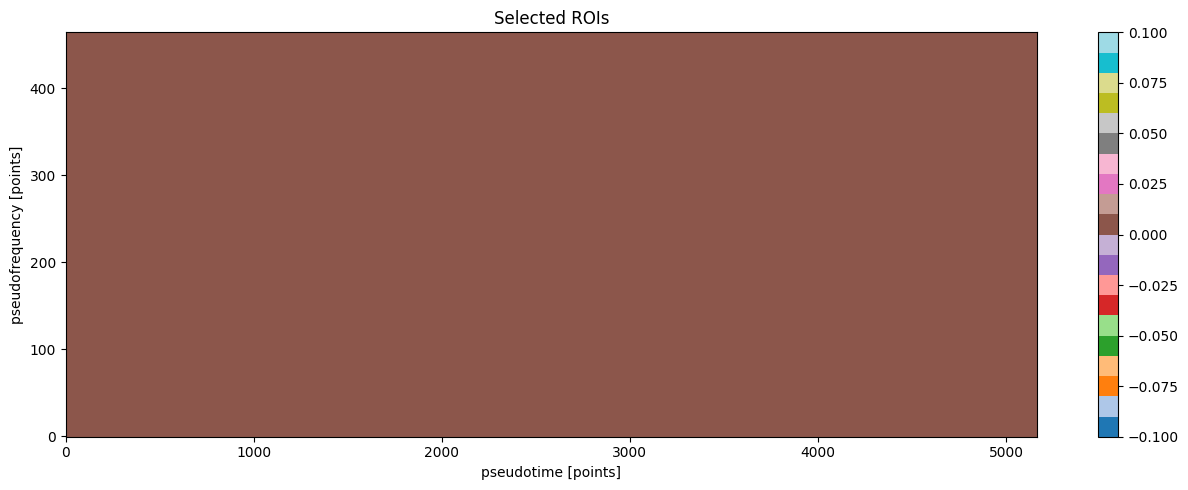

In [33]:
im_rois, df_rois = maad.rois.select_rois(im_bin, display=True)

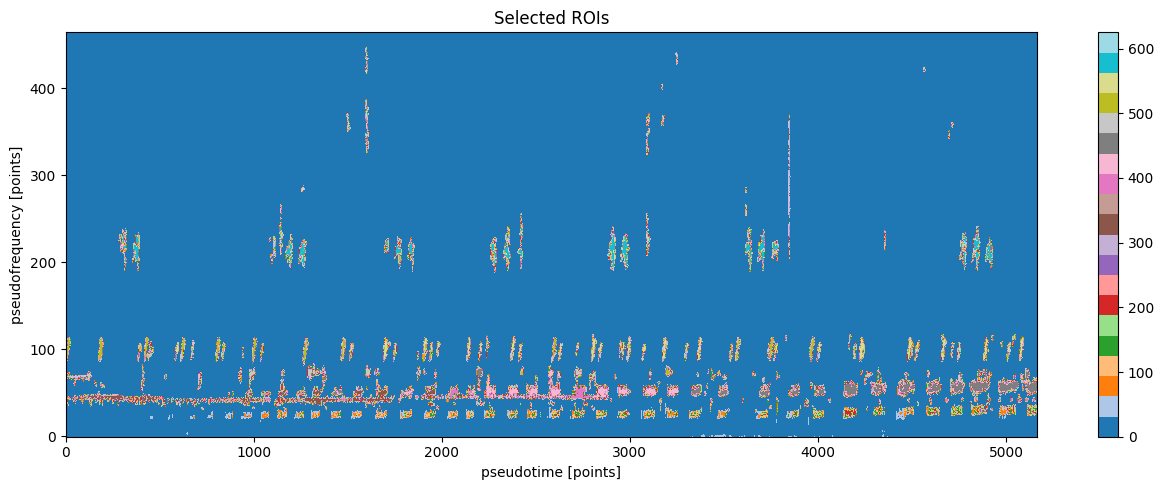

In [34]:
Sxx_noNoise = maad.sound.median_equalizer(Sxx)
Sxx_noNoise_dB = maad.util.power2dB(Sxx_noNoise)     
Sxx_noNoise_dB_blurred = maad.sound.smooth(Sxx_noNoise_dB)        
im_bin2 = maad.rois.create_mask(Sxx_noNoise_dB_blurred, bin_std=6, bin_per=0.5, mode='relative') 
im_rois2, df_rois2 = maad.rois.select_rois(im_bin2, display=True)